In [47]:
!pip install -q datascience                                       #Package that is required by pandas profiling                            
!pip install -q pandas-profiling                                  #Library to generate basic statistics about data

In [2]:
!pip install -q --upgrade pandas-profiling                        #Upgrading pandas profiling to the latest version

In [3]:
import pandas as pd                                               # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                        # Import Pandas Profiling (To generate Univariate Analysis)
import numpy as np                                                # Importing package numpys (For Numerical Python)
import matplotlib.pyplot as plt                                   # Importing pyplot interface to use matplotlib
import seaborn as sns                                             # Importing seaborn library for interactive visualization
%matplotlib inline
import scipy as sp                                                # Importing library for scientific calculations
import warnings                                                   # To suppress all the warnings in the notebook 
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/facebook_data.csv')
print('Data Shape:', data.shape)
data.head()                                                       #importing dataset

Data Shape: (99003, 15)


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [12]:
new_data.describe()                                    #it give insights into dataset

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.882600e+04,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000
mean,1.597069e+06,37.212646,14.533109,1975.787354,6.284753,535.649758,196.374031,107.480056,156.111762,142.665432,106.147846,84.118835,49.963866,58.546557
std,3.440114e+05,22.524220,9.013865,22.524220,3.529431,454.258423,387.463475,188.861581,572.553504,1388.990063,445.494703,840.543366,285.751489,601.880496
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298868e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596225e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895572e+06,50.000000,22.000000,1993.000000,9.000000,673.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [13]:
new_data.info()                                       #It gives details of null data andalong with number of rows & columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98826 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 98826 non-null  int64  
 1   age                    98826 non-null  int64  
 2   dob_day                98826 non-null  int64  
 3   dob_year               98826 non-null  int64  
 4   dob_month              98826 non-null  int64  
 5   gender                 98826 non-null  object 
 6   tenure                 98826 non-null  float64
 7   friend_count           98826 non-null  int64  
 8   friendships_initiated  98826 non-null  int64  
 9   likes                  98826 non-null  int64  
 10  likes_received         98826 non-null  int64  
 11  mobile_likes           98826 non-null  int64  
 12  mobile_likes_received  98826 non-null  int64  
 13  www_likes              98826 non-null  int64  
 14  www_likes_received     98826 non-null  int64  
dtypes:

In [14]:
new_data.dropna()                                                    #Drop all null values

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [15]:
new_data.isnull().sum()                                                #To check the null values counts

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [16]:
new_data.drop(new_data.columns[[0, 2, 3,4]], axis = 1, inplace = True)      #drop unwanted columns

In [18]:
new_data.head()

,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,14,male,266.0,0,0,0,0,0,0,0,0
1,14,female,6.0,0,0,0,0,0,0,0,0
2,14,male,13.0,0,0,0,0,0,0,0,0
3,14,female,93.0,0,0,0,0,0,0,0,0
4,14,male,82.0,0,0,0,0,0,0,0,0


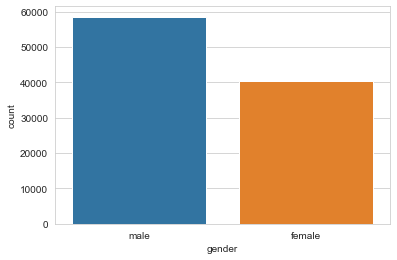

In [20]:
sns.set_style('whitegrid')
sns.countplot(x= 'gender',data= new_data,)                                   #seaborn plot for gender count

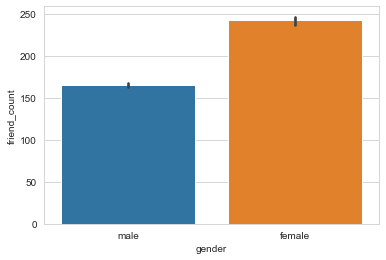

In [21]:
sns.set_style('whitegrid')
sns.barplot(x= 'gender',y= 'friend_count',data = new_data)                      #seaborn plot for friend count 

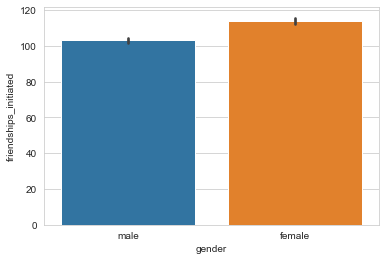

In [22]:
sns.set_style('whitegrid')
sns.barplot(x= 'gender',y= 'friendships_initiated',data = new_data)             #seaborn plot for friendships_initiated

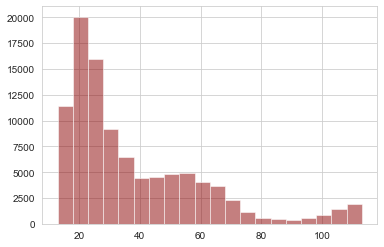

In [23]:
data['age'].hist(bins=20,color= 'darkred', alpha= 0.5)                         #hist-plot for age distribution

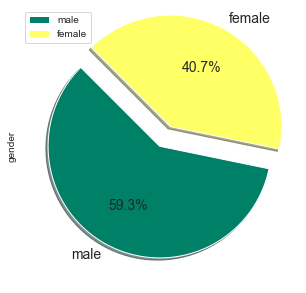

In [24]:
new_data['gender'].value_counts().plot(kind='pie', explode= [0,0.2], fontsize= 14, autopct='%3.1f%%', figsize= (5,8), shadow= True, startangle= 135,legend = True, cmap= 'summer')              #piechart for gender count

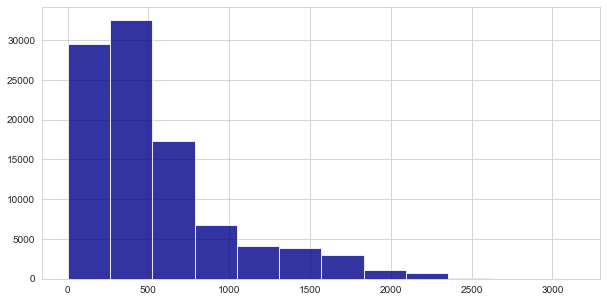

In [25]:
new_data['tenure'].hist(bins=12,color= 'darkblue', alpha= 0.8,figsize= (10,5))              #histplot for tenure distribution

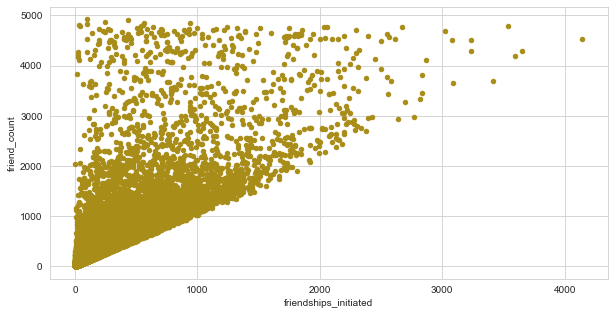

In [26]:
new_data.plot.scatter(x= 'friendships_initiated',y= 'friend_count', color= '#a98d19', figsize= (10,5))    #scatter plot 

In [27]:
new_data.corr()

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
age,1.000000,0.458675,-0.027754,-0.058432,-0.012821,-0.022612,-0.026541,-0.024253,0.015689,-0.018313
tenure,0.458675,1.000000,0.167604,0.134824,0.057696,0.027865,0.028453,0.024102,0.071244,0.030647
friend_count,-0.027754,0.167604,1.000000,0.825753,0.298096,0.236476,0.235717,0.232717,0.229798,0.220732
friendships_initiated,-0.058432,0.134824,0.825753,1.000000,0.285636,0.175118,0.229841,0.173804,0.213994,0.161405
likes,-0.012821,0.057696,0.298096,0.285636,1.000000,0.327144,0.871584,0.329048,0.644852,0.295442
likes_received,-0.022612,0.027865,0.236476,0.175118,0.327144,1.000000,0.256779,0.973676,0.255164,0.947984
mobile_likes,-0.026541,0.028453,0.235717,0.229841,0.871584,0.256779,1.000000,0.288329,0.187344,0.189923
mobile_likes_received,-0.024253,0.024102,0.232717,0.173804,0.329048,0.973676,0.288329,1.000000,0.209793,0.850473
www_likes,0.015689,0.071244,0.229798,0.213994,0.644852,0.255164,0.187344,0.209793,1.000000,0.295874
www_likes_received,-0.018313,0.030647,0.220732,0.161405,0.295442,0.947984,0.189923,0.850473,0.295874,1.000000


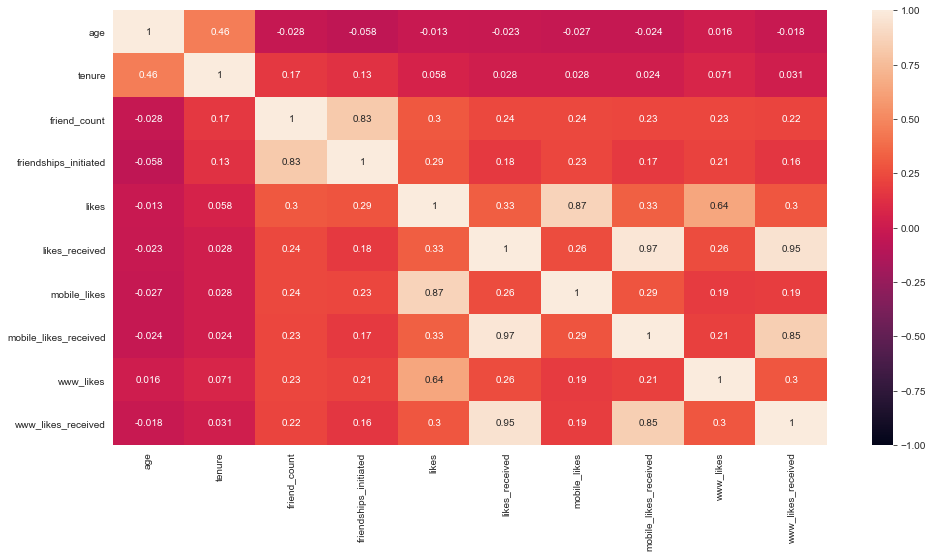

In [28]:
plt.figure(figsize=(16,8))
heatmap = sns.heatmap(new_data.corr(), vmin=-1, vmax=1, annot=True)                    #correlation for different variables

In [29]:
facebook_likes=['likes','likes_received']                      

In [30]:
gender= ['male','female']

In [31]:
df=new_data.groupby('gender').agg('mean')

In [32]:
df.head()

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
gender,,,,,,,,,,
female,39.457120,587.229231,241.977368,113.90244,260.061065,251.445965,172.921097,147.107597,87.139869,104.338269
male,35.670246,500.204391,165.035459,103.06660,84.677895,67.911548,60.261328,40.833015,24.416550,27.078533


In [33]:
df2= df.loc[gender,facebook_likes]

In [34]:
df2.head()

,likes,likes_received
gender,,
male,84.677895,67.911548
female,260.061065,251.445965


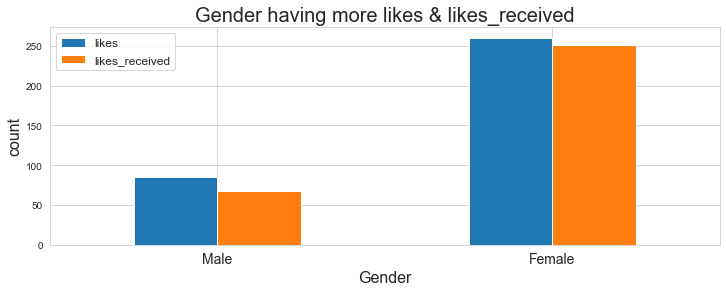

In [35]:
df2.plot(kind ='bar',figsize=(12,4))                                                 #bar plot for likes and likes_received 
plt.xticks([0,1],['Male','Female'],fontsize=14, rotation='horizontal')
plt.xlabel('Gender',fontsize=16)
plt.ylabel("count",fontsize=16)
plt.title("Gender having more likes & likes_received",fontsize=(20))
plt.legend(fontsize=12)
plt.show()

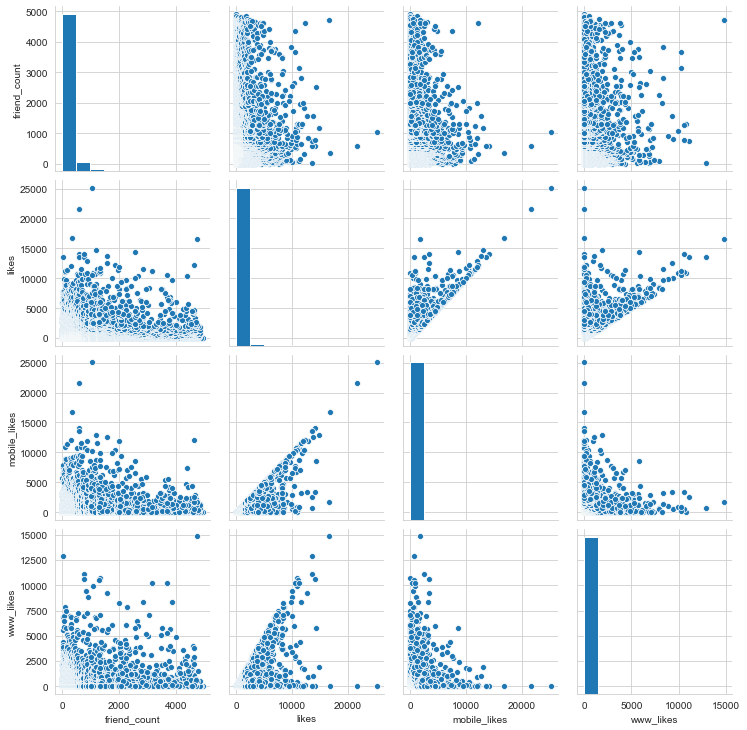

In [36]:
sns.pairplot(data,x_vars=['friend_count','likes','mobile_likes','www_likes'],y_vars=['friend_count','likes','mobile_likes','www_likes'])

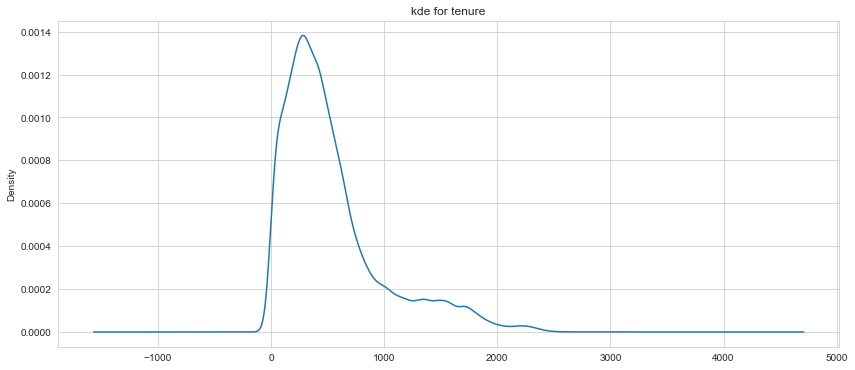

In [37]:
new_data.tenure.plot(kind = 'kde', title='kde for tenure', figsize=(14,6))                   #kernel density estimation for tenure

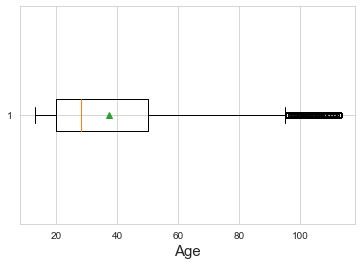

In [40]:
plt.boxplot(data['age'],showmeans=True, vert=False)                                     #boxplot for age distribution
plt.xlabel('Age',fontsize=15)
plt.show()

In [41]:
new_data['mobile_likes'].mean() #Package that is required by pandas profilin                                   #mean mobile_likes

106.14784570861919

In [42]:
new_data['www_likes'].mean()                                                        #mean www_likes

49.96386578430777

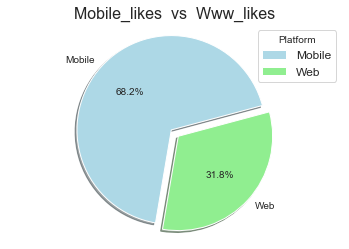

In [43]:
likes_platform=[107,50]                                                                        #pie chart mobile vs web
my_labels = 'Mobile','Web'
my_colors = ['lightblue','lightgreen']
my_explode = (0, 0.1)
plt.pie(likes_platform,labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Mobile_likes  vs  Www_likes',fontsize=16)
plt.axis('equal')
plt.legend(title='Platform',fontsize=12)
plt.show()

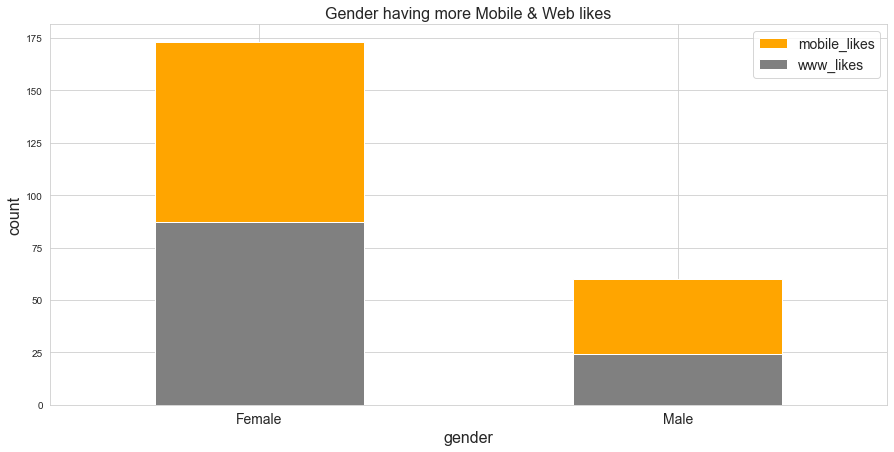

In [45]:
data.groupby(['gender'])['mobile_likes'].mean().plot(kind='bar',figsize=(15,7),color= 'orange')     #bar plot Mobile_likes vs web_likes
data.groupby(['gender'])['www_likes'].mean().plot(kind='bar',figsize=(15,7),color= 'grey')

plt.xlabel('gender',fontsize=16)
plt.xticks([0,1],['Female','Male'],fontsize=14, rotation='horizontal')
plt.ylabel('count',fontsize=16)
plt.title('Gender having more Mobile & Web likes', fontsize=16)
plt.legend(fontsize=14)
plt.show()